In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

#### In this project, I am going to analyse the stocks of few companies listed below
**Basic analysis**
1. Change of price of stocks over time
2. Daily return of the stocks in average.

**Advanced analysis**

3. Correlation between different stocks.
4. How much risk does it involve in investing in these stocks?
5. Can the future behaviour of the stock be predicted?


**Along the way required visuals will be present**

In [2]:
larsen = pd.read_csv('L&T.csv',usecols=['Month','Open Price','High Price','Low Price','Close Price','No.of Shares','Total Turnover (Rs.)'])
kirloskar = pd.read_csv('Kirloskar Ind.csv',usecols=['Month','Open Price','High Price','Low Price','Close Price','No.of Shares','Total Turnover (Rs.)'])
mahindra = pd.read_csv('Mahindra Logistics.csv',usecols=['Month','Open Price','High Price','Low Price','Close Price','No.of Shares','Total Turnover (Rs.)'])
bhel = pd.read_csv('BHEL.csv',usecols=['Month','Open Price','High Price','Low Price','Close Price','No.of Shares','Total Turnover (Rs.)'])
bharat = pd.read_csv('Bharat Forge.csv',usecols=['Month','Open Price','High Price','Low Price','Close Price','No.of Shares','Total Turnover (Rs.)'])

In [3]:
bhel.head()

,Month,Open Price,High Price,Low Price,Close Price,No.of Shares,Total Turnover (Rs.)
0,01-04-2016,113.75,135.40,112.30,125.40,23917891,2954640812
1,01-05-2016,125.25,131.95,115.75,120.70,17816754,2194695291
2,01-06-2016,122.35,128.45,113.90,127.65,16477306,2001857375
3,01-07-2016,129.00,151.25,128.75,145.80,18334350,2592516906
4,01-08-2016,146.00,149.00,132.15,139.05,16879631,2345831385


#### 1. Change of stock price over time

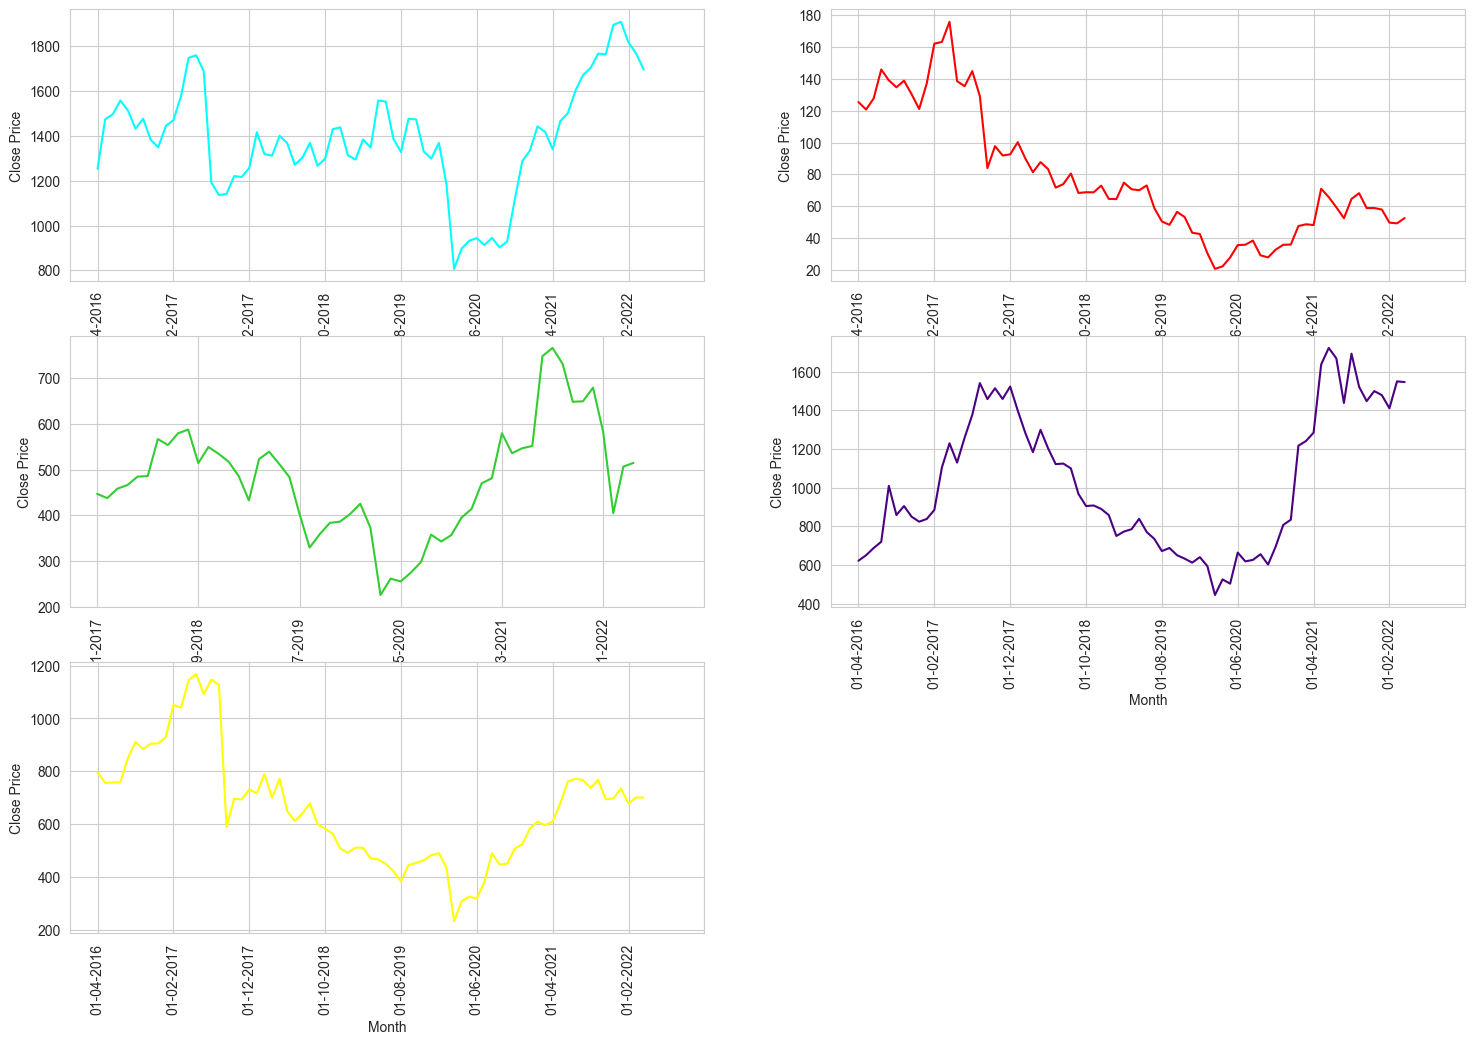

In [4]:
plt.figure(figsize=(18,12))

plt.subplot(321);
sns.lineplot(x = larsen['Month'], y = larsen['Close Price'],color='cyan')
plt.xticks([0,10,20,30,40,50,60,70,80],rotation='vertical')


plt.subplot(322)
sns.lineplot(x = bhel['Month'], y = bhel['Close Price'], color='red')
plt.xticks([0,10,20,30,40,50,60,70,80],rotation='vertical')


plt.subplot(323);
sns.lineplot(x = mahindra['Month'], y = mahindra['Close Price'],color='limegreen')
plt.xticks([0,10,20,30,40,50,60],rotation='vertical')


plt.subplot(324)
sns.lineplot(x = kirloskar['Month'], y = kirloskar['Close Price'], color='indigo')
plt.xticks([0,10,20,30,40,50,60,70,80],rotation='vertical')

plt.subplot(325)
sns.lineplot(x = bharat['Month'], y = bharat['Close Price'], color= 'yellow')
plt.xticks([0,10,20,30,40,50,60,70,80],rotation='vertical');

Inference: All the stocks seem to be performing good over time, except BHEL.

#### 2. Daily returns yield by each stock

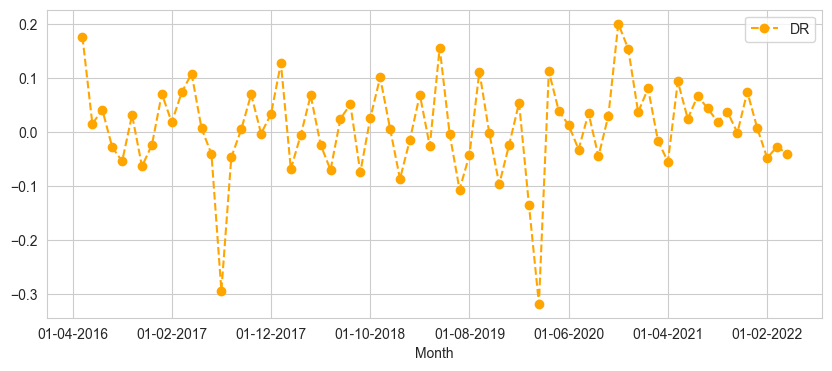

In [5]:
# L&T DAILY RETURNS
lrsn = larsen.set_index('Month')
lrsn['DR'] = lrsn['Close Price'].pct_change()
lrsn['DR'].plot(legend=True,ls='--', marker='o',figsize=(10,4),color='orange');

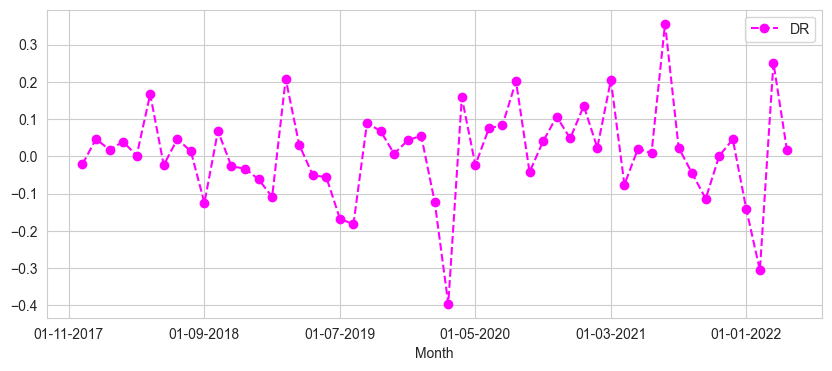

In [6]:
# MAHINDRA DAILY RETURNS
mhd = mahindra.set_index('Month')
mhd['DR'] = mhd['Close Price'].pct_change()
mhd['DR'].plot(legend=True,ls='--', marker='o',figsize=(10,4),color='magenta');

Inference: Although the data is too less to draw conclusion, but if seen for a longer time-period, both L&T and Mahindra logis have normal distribution and fairly stable mean.

#### EXTRA: Calculating Moving average

**1. It is essential to calculate MA for stock prices as it smoothens out the arbitrary price fluctuations**

In [7]:
ma_day = [10,15,20]
for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    larsen[column_name] = larsen['Close Price'].rolling(ma).mean()
    mahindra[column_name] = mahindra['Close Price'].rolling(ma).mean()
    bhel[column_name] = bhel['Close Price'].rolling(ma).mean()
    kirloskar[column_name] = kirloskar['Close Price'].rolling(ma).mean()
    bharat[column_name] = bharat['Close Price'].rolling(ma).mean()

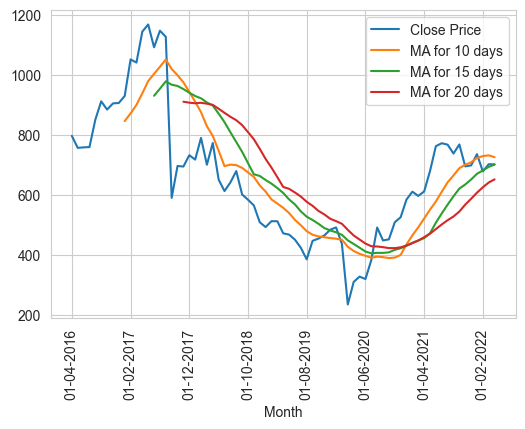

In [8]:
bhrt = bharat.set_index('Month')
bhrt[['Close Price','MA for 10 days','MA for 15 days','MA for 20 days']].plot(figsize=(6,4))
plt.xticks(rotation='vertical');

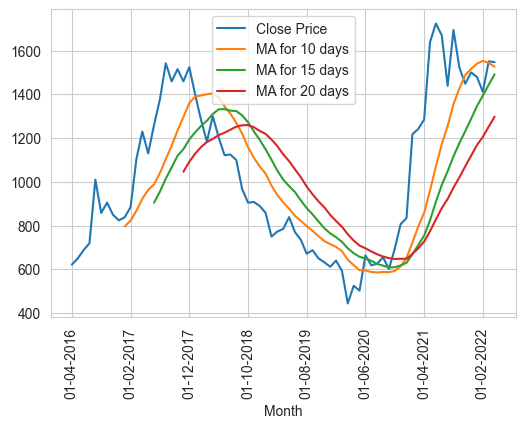

In [9]:
krls = kirloskar.set_index('Month')
krls[['Close Price','MA for 10 days','MA for 15 days','MA for 20 days']].plot(figsize=(6,4))
plt.xticks(rotation='vertical');

Inference: Moving average (MA) has smoothened out both Bharat Forge's & Kirloskar's price trend. Also one can speculate both the stock prices will have an upward trend.

#### 3. Correlation among prices of different stocks

In [10]:
# A. Create separate closing price datasets with month

larsen_cr = larsen[['Month','Close Price']]
bhel_cr = bhel[['Month','Close Price']]
bharat_cr = bharat[['Month','Close Price']]
kirloskar_cr = kirloskar[['Month','Close Price']]
mahindra_cr = mahindra[['Month','Close Price']]

In [11]:
# B. Merge datasets

final1 = larsen_cr.merge(bhel_cr,on='Month')
final2 = final1.merge(bharat_cr,on='Month')

# C. Now change the column names
final2.rename(columns={'Close Price_x':'Larsen',
                       'Close Price_y':'BHEL',
                       'Close Price':'Bharat'}, inplace=True)

# D. Now merge the remaining datasets & rename them too
final3 = final2.merge(kirloskar_cr,on='Month')
close_price = final3.merge(mahindra_cr,on='Month')

close_price.rename(columns={'Close Price_x':'Kirloskar',
                            'Close Price_y':'Mahindra'}, inplace=True)

# E. We now do not need month column
close_price.drop(columns=['Month'],inplace=True)

close_price.head()

,Larsen,BHEL,Bharat,Kirloskar,Mahindra
0,1216.85,91.90,694.10,1459.65,446.95
1,1256.95,92.60,731.90,1524.00,437.60
2,1416.60,100.25,717.25,1399.00,458.20
3,1319.10,90.00,789.65,1283.00,466.25
4,1311.90,81.40,700.15,1184.15,484.70


In [12]:
close_price.corr()

,Larsen,BHEL,Bharat,Kirloskar,Mahindra
Larsen,1.000000,0.407498,0.674012,0.700343,0.740512
BHEL,0.407498,1.000000,0.631663,0.540500,0.509070
Bharat,0.674012,0.631663,1.000000,0.918273,0.776488
Kirloskar,0.700343,0.540500,0.918273,1.000000,0.747290
Mahindra,0.740512,0.509070,0.776488,0.747290,1.000000


In [13]:
from scipy.stats import pearsonr
pearsonr(close_price['Kirloskar'], close_price['Bharat'])

PearsonRResult(statistic=0.9182726579953724, pvalue=1.4276319137508613e-22)

#### EXTRA: Correlation b/w daily returns on different stocks
**1. Helps us to understand, "whether the stock belongs to the same industry"**

In [14]:
daily_return = close_price.pct_change()
daily_return.corr()

,Larsen,BHEL,Bharat,Kirloskar,Mahindra
Larsen,1.000000,0.610376,0.607953,0.520623,0.522337
BHEL,0.610376,1.000000,0.464290,0.688539,0.359394
Bharat,0.607953,0.464290,1.000000,0.416404,0.529534
Kirloskar,0.520623,0.688539,0.416404,1.000000,0.333662
Mahindra,0.522337,0.359394,0.529534,0.333662,1.000000


In [15]:
pearsonr(daily_return['Kirloskar'].dropna(),daily_return['BHEL'].dropna())

PearsonRResult(statistic=0.6885394792176287, pvalue=1.2098641587957151e-08)

Inference: Correlation of daily returns b/w Kirloskar Ind & BHEL is 69%. The p-Value is significant.

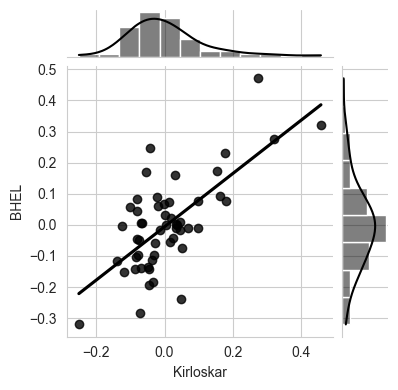

In [16]:
sns.jointplot(data=daily_return,kind='reg',x='Kirloskar',y='BHEL',ci=False,color='black',height=4);

#### 4. How much risk does it involve in investing in these stocks?

In [17]:
daily_return.quantile(0.05)

Larsen      -0.100880
BHEL        -0.212532
Bharat      -0.113955
Kirloskar   -0.122472
Mahindra    -0.172953
Name: 0.05, dtype: float64

* Inference: 
1. If you invest in 100000/- in BHEL, the value at risk (VaR) is 100000*0.212 = 21200/-
2. It means with 95% confidence the most loss we may incur in a day is 21200/- 
3. The best performing stock is L&T, with 10000/-  minimum VaR.

### 5. Can the future behavior of the stock be predicted?

* In stock price analysis, Monte Carlo simulation can be applied to estimate the potential future price movements of a stock. Stock prices are influenced by a wide range of factors, such as market trends, economic indicators, company news, and investor sentiment, all of which can be unpredictable. Monte Carlo simulation helps to capture this uncertainty and provide a range of possible outcomes.

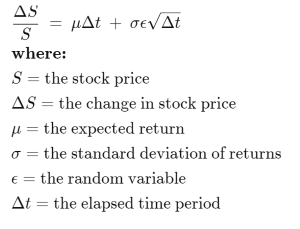


In [18]:
days = 365

dt = 1/days

stocks = ['Larsen', 'BHEL', 'Bharat', 'Kirloskar', 'Mahindra']

def stock_monte_carlo(start_price,days,stock):

    for stock in stocks:
        mu = daily_return.mean()[stock]
        sigma = daily_return.mean()[stock]

    price = np.zeros(days)
    price[0] = start_price

    shock = np.zeros(days)
    drift = np.zeros(days)


    for x in range(1,days):
        shock[x] = np.random.normal(loc = mu*dt,scale=sigma*np.sqrt(dt))

        drift[x] = mu * dt

        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))

    return price

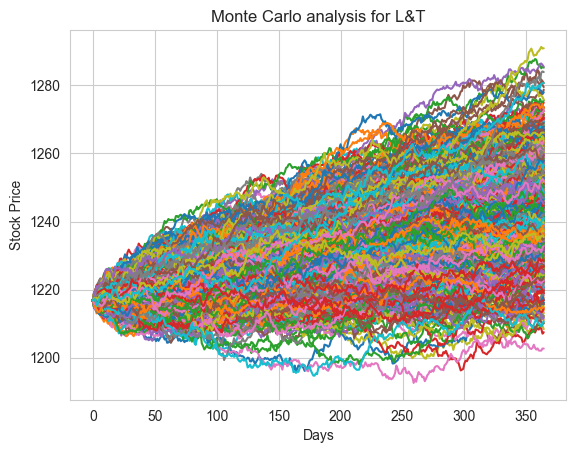

In [19]:
start_price = 1216.85
for run in range(1000):
    plt.plot(stock_monte_carlo(start_price,days,stock='Larsen'))
plt.xlabel("Days")
plt.ylabel('Stock Price')
plt.title('Monte Carlo analysis for L&T');

Inference: If analysed closely, monte carlo simulation ater running 1000 times shows the price of L&T has an upward trend, hence buying it will be profitable.

* Now the above diagram may be difficult to understand, so we plot a histogram of all the 1000 lines end points

In [20]:
runs = 10000

simulations = np.zeros(runs)

# It captures the end value (364th day) of 1000 runs of monte carlo sim.
for x in range(runs):
    simulations[x] = stock_monte_carlo(start_price,days,stock='Larsen')[days-1]

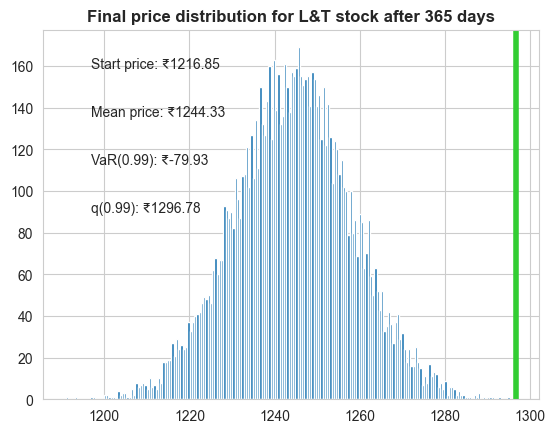

In [21]:
# Now we'll define q as 1% empirical quantile, this means that 99% of the value lies in this range
q = np.quantile(simulations,1)

# Now plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using additon syntaxes, we will make it more visually appealing

# Legend for Starting price
plt.figtext(0.2,0.8, s='Start price: ₹%.2f' % start_price)

# Legend for mean price
plt.figtext(0.2,0.7,s='Mean price: ₹%.2f' % simulations.mean())

# Variance of the price (within 99% ci)
plt.figtext(0.2,0.6,s='VaR(0.99): ₹%.2f' % (start_price-q,))

# Display 1% quantile
plt.figtext(0.2,0.5,s='q(0.99): ₹%.2f' % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q,linewidth=4,color= 'limegreen')

# Plot the title
plt.title('Final price distribution for L&T stock after %s days' % days, weight='bold');

**Inference**: A negative VaR means L&T over the next year has a 99% chance of making more than ₹1216.85. Also it's mean is higher than starting price, which also indicates appreciation of stock over a year.